### 학습목표
- knn(k-nearest neighbors) 모델에 대해서 이해하자
- 유유상종 개념과 유사
- 새로운 데이터 셋이 들어오면 훈련데이터 셋과의 거리를 계산하여 예측
- knn 모델을 활용하여 하이퍼 파라미터 조절을 통한 과대적합 확인
- 붓꽃데이터 (특성 : 4개, 3개 클래스 -> 3품종 하나로 예측)

In [2]:
# 라이브러리 불러오기 
import numpy as np # 수치계산용 라이브러리
import pandas as pd # 표를 다룰때 사용
import matplotlib.pyplot as plt # 그래프(시각화) 라이브러리
# 머신러닝 라이브러리 
from sklearn.neighbors import KNeighborsClassifier # knn 분류 모델
from sklearn.metrics import accuracy_score # 분류용 모델 평가도구 (정확도)

In [8]:
# 데이터 불러오기
from sklearn.datasets import load_iris # 사이킷런에서 제공해주는 붓꽃데이터
iris_data = load_iris()
iris_data
# 번치객체 : 사이킷런에서 제공하는 자료형태
# 파이썬에서 딕셔너리처럼 사용 (key : value)

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [9]:
# 데이터에서 키값만 꺼내서 보기
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [10]:
# data " 특성(문자데이터) -> 4개 특성
# target : 정답데이터
# target_names ; 정답데이터의 실제이름
# feature)name : 특성(문제데이터) 이름

In [20]:
# 특성 (정답데이터) 확인
iris_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [13]:
# 특성의 이름 확인
iris_data.feature_names
# 'sepal length (cm)' : 꽃받침의 길이
# 'sepal width (cm)' : 꽃받침의 넓이
# 'petal length (cm)' : 꽃잎의 길이
# 'petal width (cm)' : 꽃임의 넓이

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
# 정답데이터 확인
iris_data.target
# 0,1,2 총 3개의 품종으로 분류

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
# 정답데이터의 이름 확인
iris_data.target_names
# [0,1,2] = ['setosa', 'versicolor', 'virginica']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### 머신러닝 확습을 위한 데이터 준비
- 문제데이터 DataFrame화 해주기
- 문제데이터(X)D와 정답데이터(y)로 저장
- 훈련용데이터(train), 테스트용데이터(test)로 분리

In [26]:
iris_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [53]:
# 문제데이터
X = iris_df
# 정답데이터
y = iris_data.target

In [136]:
from sklearn.model_selection import train_test_split
# 훈련용, 테스트용 [70:30] -> 랜덤샘플링 도구
# train_test_split(문제, 정답, 분리비율)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 11)

# random_state : 랜덤샘플링 랜덤규칙을 고정
# 모델생성시 하이퍼파라미터 조절을 할 때 정확도를 올리는 변수요인이 한가지 (하이퍼파라미터)

In [137]:
# 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(105, 4) (45, 4) (105,) (45,)


In [138]:
X_train.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
98,5.1,2.5,3.0,1.1
58,6.6,2.9,4.6,1.3
35,5.0,3.2,1.2,0.2
130,7.4,2.8,6.1,1.9
46,5.1,3.8,1.6,0.2


### 모델링

In [139]:
# 모델객체 생성 (하이퍼파림터 조절x)
# 모델명 : knn_model
knn_model = KNeighborsClassifier(n_neighbors=8)

In [140]:
# 모델학습
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [141]:
# 모델예측
pre = knn_model.predict(X_test)

In [142]:
# 모델평가
accuracy_score(pre,y_test)

0.9777777777777777

In [143]:
# 모델을 평가하는 또다른 방법
# 방법1. 예측 후 accuracy_score 함수를 가져와서 평가 -> 예측결과를 확인할 때 사용
# 방법2. 모델이 score 함수 사용해서 결과를 출력
# 모델평.score(테스트용 문제, 테스트용 정답)
knn_model.score(X_test, y_test)

0.9777777777777777

In [144]:
# 일반화 가능한 하이퍼 파라미터 알아보자!
# knn model에서 하이퍼 파라미터를 튜닝
# 1-100 이웃의 수를 변경 -> 시각화

# train, test 데이터의 정확도를 저장하는 빈 리스
train_accuracy = []
test_accuracy = []
n_set = range(1,51)
for i in n_set:
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    acc_train = knn.score(X_train, y_train)
    train_accuracy.append(acc_train)
    acc_test = knn.score(X_test, y_test)
    test_accuracy.append(acc_test)

### 시각화

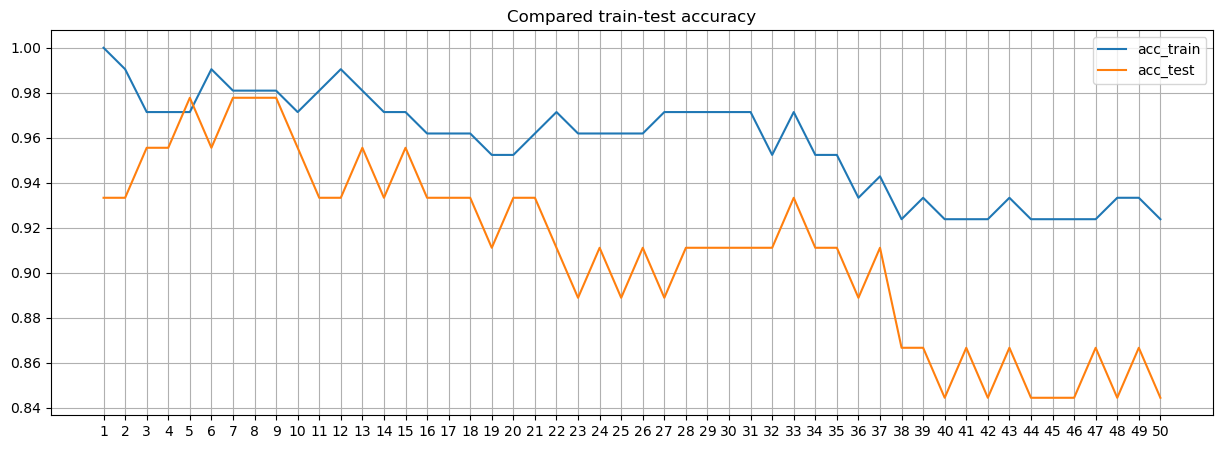

In [145]:
plt.figure(figsize=(15, 5))
plt.title("Compared train-test accuracy")
plt.plot(n_set, train_accuracy, label = 'acc_train')
plt.plot(n_set, test_accuracy, label = 'acc_test')
plt.xticks(n_set)
plt.legend()
plt.grid()
plt.show()